# Modeling

## Step 1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Step 2: Reading the data

In [2]:
df_combined = pd.read_csv('/Users/ksah4444/Documents/UFC_ML_Prediction/data/Clean_Data/df_combined.csv')

In [3]:
df_combined.drop(['Unnamed: 0'], axis = 1, inplace=True)

## Target + Feature Engineering

## Target engineering

#### Since the target we have is a binary variable, there is no target engineering to be done. 
#### Perhaps the only taget engineering we have conducted was in the cleaning phase, when I got ride of rows with no winner in them. I also got rid of fights that ended with a DQ win because I don't think they add to the accuracy of my model

## Feature engineering

### Dealing with missigness

#### Again, most of the target and feature engineering was conducted during the cleaning phase.
#### What we did was mostly, amputating missing values. Except for the "reach" column where we used the "height" column values to fill in the missing values as explained in that sectio.

### Numeric feature engineering

### Numeric feature filtering

In [4]:
# We don't need the "indexfighter1,2" (not needed), "ape_indexfighter1,2" (redundant), "weightfighter1,2" (redudant). (6 columns)
df_combined.drop(['indexfighter1','indexfighter2','ape_indexfighter1','ape_indexfighter2',
'weightfighter1','weightfighter2'], axis = 1, inplace=True)

### Normalization & Standarization

#### when in doubt, normalize.

### Categorical feature filtering

In [5]:
# We don't need the "date" (not needed), "location" (not needed), "Fight_type" (redundant). (3 columns)
df_combined.drop(["date","location", "Fight_type"], axis = 1, inplace=True)

In [6]:
# Encode the caterogical data
cats = ["win_by", "weight_classfighter1", "weight_classfighter2"]

In [7]:
# Encode the caterogical data
for cat in cats:
    df_combined[cat].fillna("unk", inplace=True)
    df_combined[cat] = df_combined[cat].astype("category")
df_combined[cats] = df_combined[cats].apply(lambda col: col.cat.codes)
df_combined

,R_fighter,B_fighter,win_by,last_round,Winner,Agefighter1,weight_classfighter1,height_cmfighter1,reach_cmfighter1,Number_of_fightsfighter1,...,Number_of_fightsfighter2,win_percentagefighter2,O_SLpMfighter2,O_StrPctfighter2,D_SApMfighter2,D_StrPctfighter2,O_TdAvgfighter2,O_TdAccfighter2,O_SubAvgfighter2,D_TdPctfighter2
0,Adrian Yanez,Gustavo Lopez,3,3,1,28,0,170.0,178.0,18,...,19,0.631579,2.48,0.40,3.87,0.57,1.74,0.41,0.7,0.31
1,Trevin Giles,Roman Dolidze,2,3,1,29,6,183.0,188.0,18,...,10,0.900000,2.36,0.48,1.40,0.64,2.74,0.52,1.5,0.37
2,Harry Hunsucker,Tai Tuivasa,3,1,0,33,3,188.0,190.0,12,...,18,0.833333,4.54,0.52,3.56,0.48,0.00,0.00,0.0,0.50
3,Marion Reneau,Macy Chiasson,2,3,0,44,0,168.0,173.0,18,...,10,0.800000,4.04,0.46,2.56,0.45,1.08,0.23,0.4,0.64
4,Leonardo Santos,Grant Dawson,3,3,0,42,5,183.0,190.0,25,...,19,0.894737,3.06,0.50,2.05,0.49,3.36,0.32,1.3,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,Don Frye,Mark Coleman,3,1,0,56,3,185.0,185.0,30,...,26,0.615385,1.88,0.52,2.62,0.40,3.89,0.40,0.8,0.50
5613,Mark Coleman,Gary Goodridge,4,1,1,57,4,185.0,190.0,26,...,46,0.500000,1.84,0.56,2.14,0.48,0.40,1.00,0.8,0.53
5614,Don Frye,Gary Goodridge,3,1,1,56,3,185.0,185.0,30,...,46,0.500000,1.84,0.56,2.14,0.48,0.40,1.00,0.8,0.53
5615,Ken Shamrock,Kimo Leopoldo,4,1,1,58,4,185.0,183.0,47,...,18,0.555556,0.76,0.83,2.12,0.30,4.55,1.00,2.3,0.00


## SVM

In [8]:
# Split feature/target 
y = df_combined[['Winner']]
x = df_combined.drop(columns=['Winner','R_fighter','B_fighter'])

### Split 75/25

In [9]:
# Split data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [10]:
# Standarize the training set
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [11]:
# Start SVM model and fit to training set
svm = SVC(kernel='rbf', C = 10, gamma = 0.01,probability=True)
svm.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=0.01, probability=True)

### Scoring

In [12]:
# Get an intitial look at the accuracy score of the data
ypred = svm.predict(xtest)
print(accuracy_score(ytest,ypred))

0.7067615658362989


In [13]:
# Create confusion matrix
cf_matrix = confusion_matrix(ytest,ypred)

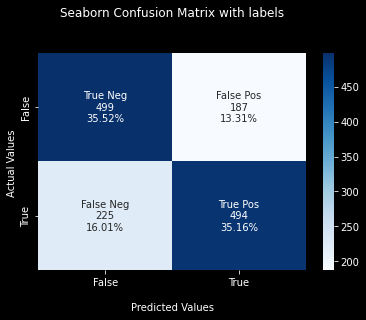

In [14]:
# Plot confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#### https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=Plot%20Confusion%20Matrix%20for%20Binary%20Classes%20With%20Labels&text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation


### Actual values = True, False
### Predicted values = Positive, Negative

1 = Positive, True
<br>
0 = Negative, False

In [15]:
# Print scoring metrics
print('Precision: %.3f' % precision_score(ytest, ypred))
print('Recall: %.3f' % recall_score(ytest, ypred))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred))

Precision: 0.725
Recall: 0.687
Accuracy: 0.707
F1 Score: 0.706


Precision Score = TP / (FP + TP)
<br>
Recall Score = TP / (FN + TP)
<br>
Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
<br>
F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)


#### AUC + ROC

In [16]:
# Predict probabilities
pred_prob1 = svm.predict_proba(xtest)   

# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)

# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)


# AUC scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])

print(auc_score1)

0.7839017585973392


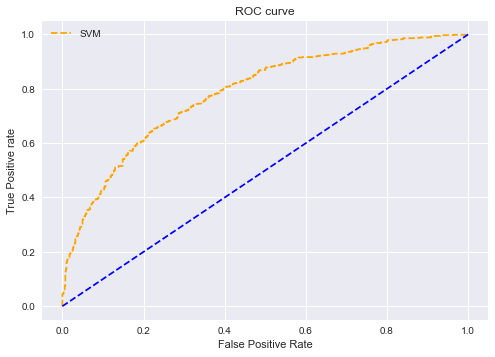

0.7839017585973392


In [20]:
# Plot ROC curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
print(auc_score1)

#### https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

#### https://www.datacamp.com/community/tutorials/random-forests-classifier-python

### Hypertuning

In [18]:
hyperF = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
gridF = GridSearchCV(svm, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(xtrain, ytrain.values.ravel())

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [19]:
print("Tuned Hyperparameters :", gridF.best_params_)
print("Accuracy :",gridF.best_score_)

Tuned Hyperparameters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy : 0.7148622981956315
